# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Assignment 4

#### Yogendra Singh  &emsp;  214161014 <br><br> M Shanmukh Rao &emsp;   214161004

<br><br><b>1. Randomly generate $n=1000$ 2D points $S_{𝒆} = \{x_{1},x_{1},....x_{n}\}$ inside a 2D ellipse of axes $r_{x} = 150$, $r_{y}=100$ and centered at $x_{𝒄}=(-10,20)$.The axes of ellipse are aligned with the co-ordinate system axes.

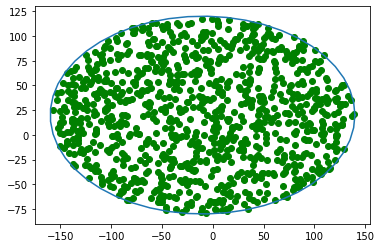

1000 points generated randomly in the given ellipse


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

mu_x = -10
mu_y = 20
a = 150
b = 100
n=1000

#here since dimension=2 is very low rejection method works
count = 0
x = []
y = []
for i in range(2*n):
    rand1 = np.random.uniform(-a,a)
    rand2 = np.random.uniform(-b,b)
    xi = mu_x + rand1
    yi = mu_y + rand2
   
    #rejecting points which are not in ellipse
    if((np.square(rand1)/a**2) + (np.square(rand2)/b**2) <= 1):
        count = count+1
        x.append(xi)
        y.append(yi)
        
    if count == n:
        break


plt.scatter(x, y, color='g')

t = np.linspace(0, 2*np.pi, 50)
plt.plot( mu_x + a * np.cos(t) , mu_y + b * np.sin(t) )
plt.show()
print(f"{count} points generated randomly in the given ellipse")

<br><br><b>2. Randomly generate $n=1000$ points $S_{hs} = \{x_{1},x_{1},....x_{n}\}$ inside a 10 Dimensional hypersphere of radius $r = 100$, centered at $x_{𝒄}=(-1,2,-1,0,0,0,3,4,9,0)$.

In [2]:
#2

center = np.array([-1,2,-1,0,0,0,3,4,9,0]).reshape(1,10)
R = 100
n = 10

#generating 1000 normal distributed n-dimensional vectors
vectors = np.random.randn(1000,n)

#normalising the vectors
norm_of_vectors = np.sqrt(np.sum(np.square(vectors), axis=1, keepdims=True))
points_on_sphere = np.divide(vectors, norm_of_vectors)

#now we have 1000 uniformly distributed points on the surface of n-dimensional sphere with radius 1
#checking the norm of these vectors
rand = np.random.randint(0,1000)
test_vector = points_on_sphere[rand,:]
test_norm = np.linalg.norm(test_vector)
print(f'norm of {rand}th point is {test_norm}')

#Now for getting these points inside the sphere of radius R
#we just need to multiply by a proper factor(<R)
#but if we use factor matrix U in uniform[0,R] that will create points accumulated near center
#So for getting uniformly distributed points inside a n-dimensional sphere
#We need to take (1/n)th power of factor matrix U and then multiply by R

U = np.random.uniform(0,1,1000)
U = np.power(U,(1/n)).reshape(1000,1)
U = R * U
points_inside_sphere = np.multiply(points_on_sphere, U)


#now we have 1000 n-dimensional normal vectors
#checking the norm of these vectors
rand = np.random.randint(0,1000)
test_vector = points_inside_sphere[rand,:]
test_norm = np.linalg.norm(test_vector)
print(f'norm of {rand}th point is {test_norm}')


#lets test 
#in the sphere with radius = 90 there should be approx 348 points
#1000 * (0.9)^10 = 348.67
count = 0
for i in range(1000):
    if(np.linalg.norm(points_inside_sphere[i,:]) <= 90):
        count = count+1
        
print(f'number of points with radius<=90: {count}')


#Finally shifting the center
required_points = points_inside_sphere + center


norm of 383th point is 0.9999999999999999
norm of 186th point is 78.8510068732664
number of points with radius<=90: 353


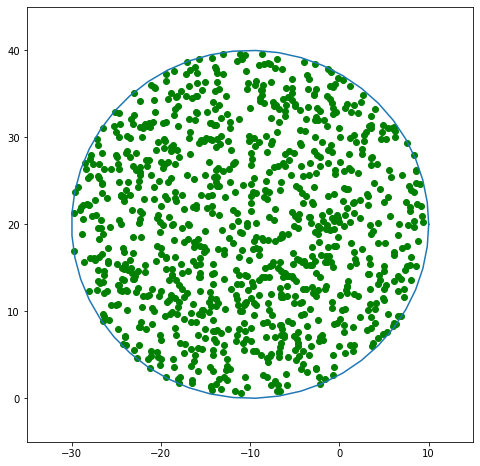

In [3]:
#2 test
#testing in 2D

mu_x = -10
mu_y = 20
r = 20
n=2

vectors = np.random.randn(1000,n)

norm_of_vectors = np.sqrt(np.sum(np.square(vectors), axis=1, keepdims=True))
points_on_sphere = np.divide(vectors, norm_of_vectors)

U = np.random.uniform(0,1,1000)
U = np.power(U,(1/n)).reshape(1000,1)
U = r * U

points = np.multiply(points_on_sphere, U)
points_inside_sphere = points + np.array([mu_x, mu_y])

x = points_inside_sphere[:,0]
y = points_inside_sphere[:,1]

plt.figure(figsize=(8,8))
plt.xlim([-35, 15])
plt.ylim([-5, 45])
plt.scatter(x, y, color='g')

t = np.linspace(0, 2*np.pi, 50)
plt.plot( mu_x + r * np.cos(t) , mu_y + r * np.sin(t))
plt.show()




<b>Note: As we can visualise, the method works in 2D.

<br><br><b>3. Randomly generate $n=1000$ 2D points $S_{𝒆} = \{x_{1},x_{1},....x_{n}\}$ inside an oriented 2D ellipse of axes $r_{x} = 150$, $r_{y}=100$ and centered at $x_{𝒄}=(-10,20)$.The major axis makes an angle of $\theta = \frac{\pi}{3}$ with the horizontal axis $\hat{X}$.

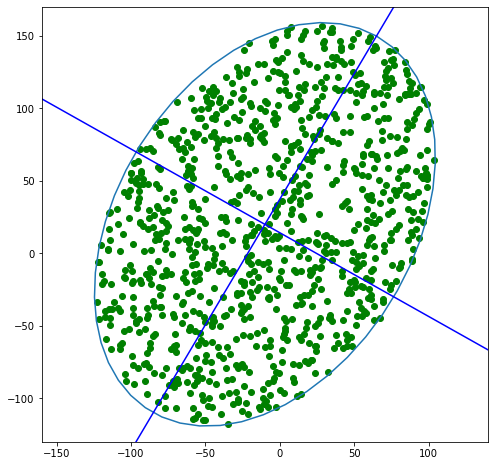

In [4]:

def oriented_ellipse(n,show):
    mu_x = -10
    mu_y = 20
    a = 150
    b = 100

    count = 0
    x = []
    y = []

    #points inside ellipse with given dimensions but centered at origin
    for i in range(2*n):
        rand1 = np.random.uniform(-a,a)
        rand2 = np.random.uniform(-b,b)
        xi = rand1
        yi = rand2

        #rejecting points which are not in ellipse
        if((np.square(rand1)/a**2) + (np.square(rand2)/b**2) <= 1):
            count = count+1
            x.append(xi)
            y.append(yi)

        if count == n:
            break


    #transformation matrix
    B = np.pi/3
    tm = np.array([[np.cos(B) , np.sin(B)],[-np.sin(B) , np.cos(B)]])
            

    #rotate these points and then translate to (mu_x,mu_y)
    x = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    points = np.hstack((x,y))
    rotated_points = np.dot(points,tm)
    new_points = rotated_points + np.array([mu_x,mu_y]).reshape(1,2)
    
    
    if (show == 1):   
        origin = [mu_x, mu_y]

        plt.figure(figsize=(8,8))
        plt.xlim([-160, 140])
        plt.ylim([-130, 170])


        plt.scatter(new_points[:,0], new_points[:,1], color='g')

        t = np.linspace(0, 2*np.pi, 50)
        xp = (a * np.cos(t)).reshape(-1,1)
        yp = (b * np.sin(t)).reshape(-1,1)
        pts = np.hstack((xp, yp))
        rotated_pts = np.dot(pts,tm)
        new_pts = rotated_pts + np.array([mu_x,mu_y]).reshape(1,2)

        plt.plot(new_pts[:,0], new_pts[:,1])

        x_maj = np.linspace(-180,180,50)
        c = mu_y - np.tan(B) * mu_x
        y_maj = np.tan(B) * x_maj + c
        plt.plot(x_maj, y_maj, color = 'b')

        x_min = np.linspace(-180,180,50)
        c = mu_y + mu_x/np.tan(B)
        y_min = (-1/np.tan(B)) * x_min + c
        plt.plot(x_min, y_min, color = 'b')

    return new_points
    
new_points = oriented_ellipse(1000,show = 1)

<br><br><b>4. Compute the $2*2$ Covariance Matrix _C_ using the points in $S_{𝒆𝒐}$. Plot the Eigen Vectors $(\hat{e_{1}},\hat{e_{2}})$ of _C_ and the axes of the oriented ellipse, all originating from the center $x_{𝒄}$. The lengths of $(\hat{e_{1}},\hat{e_{2}})$ should be respectively set to $(k\sqrt{\lambda_{1}},k\sqrt{\lambda_{2}})$. Change the value of $n$ and report observations. Try plotting with $k=3,4,5$.

<b>$k=3$

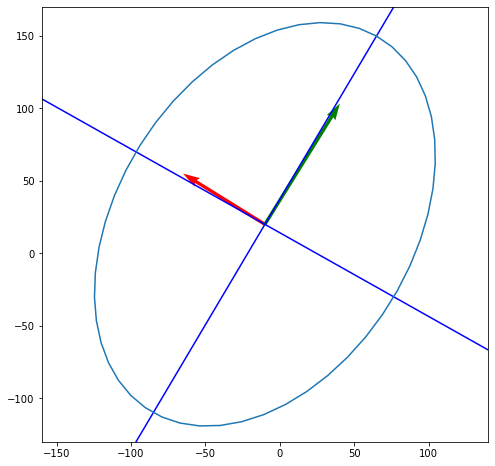

In [5]:
def eig_vec_and_axes(new_points,k):
    cov_matrix = np.cov(new_points.T)

    eig_val, eig_vec = np.linalg.eig(cov_matrix)

    origin = [mu_x,mu_y]
    
    #transformation matrix
    B = np.pi/3
    tm = np.array([[np.cos(B) , np.sin(B)],[-np.sin(B) , np.cos(B)]])
    
    eig_val1 = eig_val[0]
    eig_val2 = eig_val[1]
    eig_vec1 = k * np.sqrt(eig_val1) * eig_vec[:,0]
    eig_vec2 = -k * np.sqrt(eig_val2) * eig_vec[:,1]
    angle1 = np.arctan(eig_vec1[1] / eig_vec1[0])
    angle2 = np.arctan(eig_vec2[1] / eig_vec2[0])


    plt.figure(figsize=(8,8))
    plt.xlim([-160, 140])
    plt.ylim([-130, 170])
    
    plt.quiver(*origin, *eig_vec1, color=['r'], scale = 700)
    plt.quiver(*origin, *eig_vec2, color=['g'], scale = 700)
    
    x_maj = np.linspace(-180,180,50)
    c = mu_y - np.tan(B) * mu_x
    y_maj = np.tan(B) * x_maj + c
    plt.plot(x_maj, y_maj, color = 'b')
    
    x_min = np.linspace(-180,180,50)
    c = mu_y + mu_x/np.tan(B)
    y_min = (-1/np.tan(B)) * x_min + c
    plt.plot(x_min, y_min, color = 'b')
    
    t = np.linspace(0, 2*np.pi, 50)
    xp = (a * np.cos(t)).reshape(-1,1)
    yp = (b * np.sin(t)).reshape(-1,1)
    pts = np.hstack((xp, yp))
    rotated_pts = np.dot(pts,tm)
    new_pts = rotated_pts + np.array([mu_x,mu_y]).reshape(1,2)
    
    plt.plot(new_pts[:,0], new_pts[:,1])

    plt.show()


eig_vec_and_axes(new_points,k=3)

<br><br><b>$k=4$ and $n=1000$

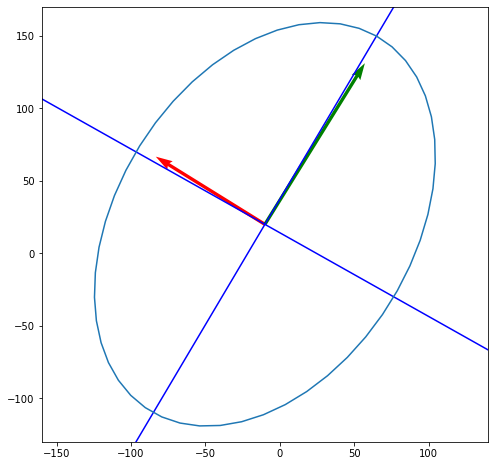

In [6]:
eig_vec_and_axes(new_points, k=4)

<br><br><b>$k=5$ and $n=1000$

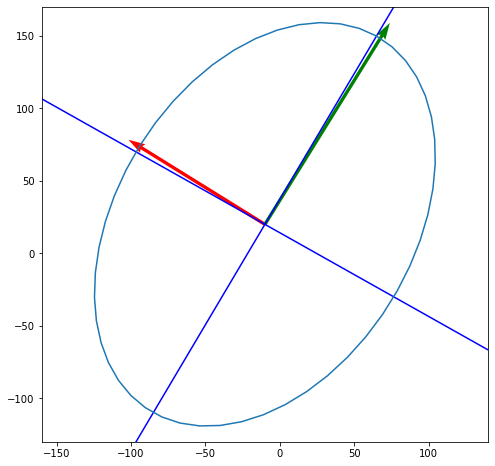

In [7]:
eig_vec_and_axes(new_points, k=5)

<br><br><b>$k=3$ and $n=500$

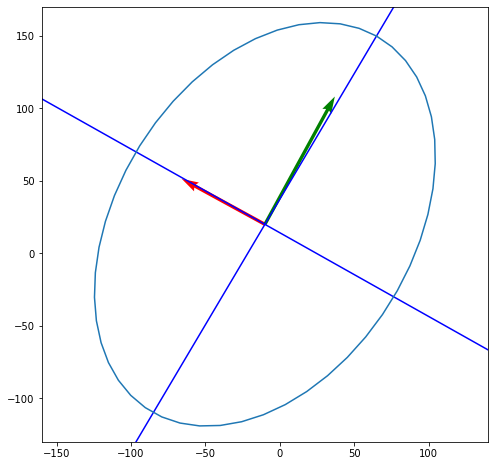

In [8]:
new_points = oriented_ellipse(500,0)
eig_vec_and_axes(new_points, k=3)

<br><br><b>$k=4$ and $n=500$

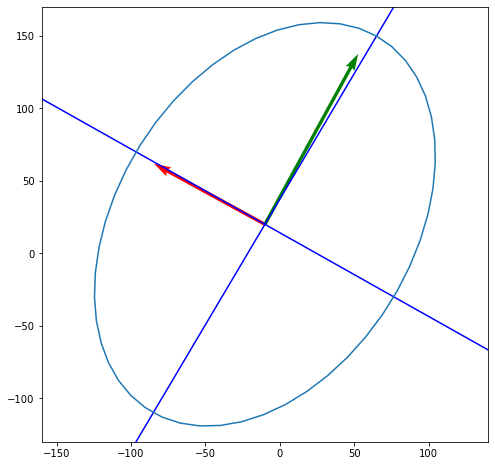

In [9]:
eig_vec_and_axes(new_points ,k=4)

<br><br><b>$k=5$ and $n=500$

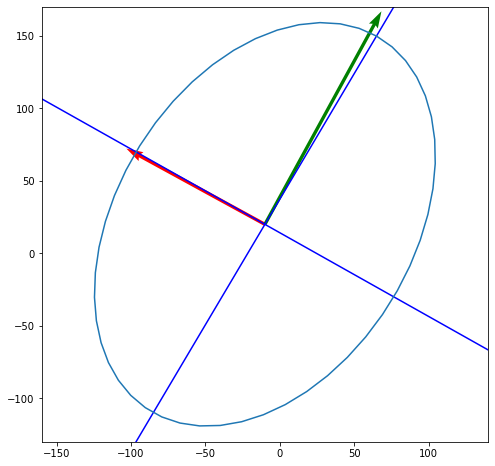

In [10]:
eig_vec_and_axes(new_points ,k=5)

<br><br><b>5. Generate $n=5000$ numbers $S = \{x_{1},x_{1},....x_{n}\}$ between $x_{min}=-750$ and $x_{max}=750$. Estimate the distribution (p.m.f.)$\hat{P}$ from this dataset by using a bin-size of $b_{s} =5$.

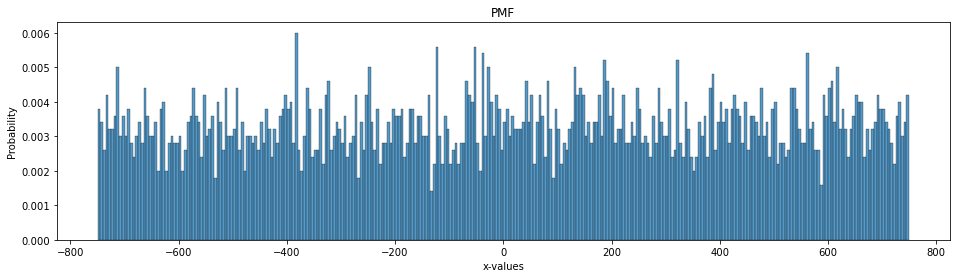

In [20]:
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import seaborn as sns


def parent_dist(n,bin_size):
    xmin=-750
    xmax=750

    S = np.random.uniform(xmin,xmax,n)
    plt.figure(figsize=(16,4))
    plt.ylabel('Probability')
    plt.xlabel('x-values')
    plt.title('PMF')
    fig=sns.histplot(S, stat='probability', bins= int((xmax - xmin)/bin_size))

    #creating np array containing the midpoints of each bin
    low=(xmin+(xmin+bin_size))/2
    high=(xmax+(xmax+bin_size))/2
    x=np.arange(low,high,bin_size)

    #retrieving the probability values from the pmf plot
    y=[h.get_height() for h in fig.patches]
    y=np.array(y)
    return y

y = parent_dist(5000,5)


In [24]:
s = np.cumsum(y)
n2,k in enumerate(s)

NameError: name 'n2' is not defined

<br><br><b>6. Generate $n^{\prime}=3000$ random numbers $S^{\prime}=\{x_{1}^{\prime},x_{2}^{\prime},...x_{n}^{\prime}\}$ between $x_{min}=-750$ and $x_{max}=750$ by using the distribution (p.m.f) $\hat{P}$. Estimate the distribution (p.m.f) $\hat{Q}$ from $S^{\prime}$ by using bin-size of $b_{s}=5$.

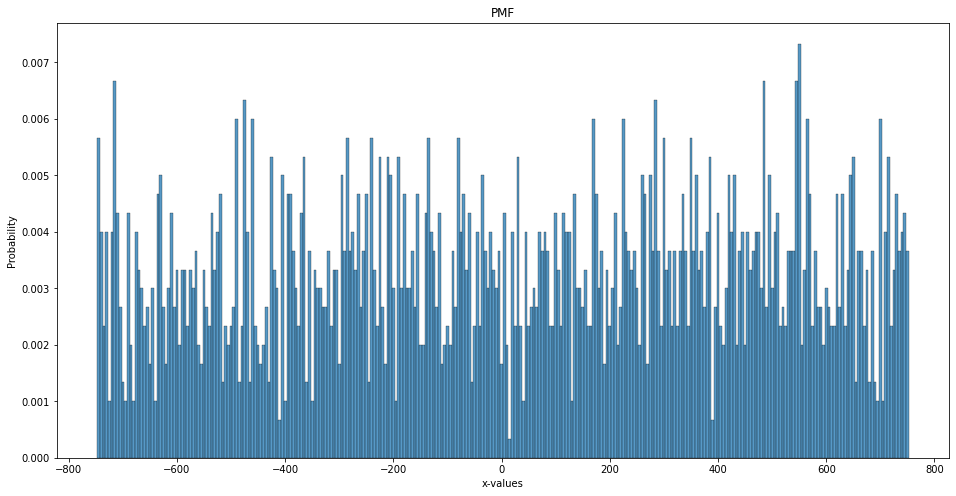

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd
import seaborn as sns



def child_dist(y,n1,bin_size):
    
    xmin=-750
    xmax=750
    low=(xmin+(xmin+bin_size))/2
    high=(xmax+(xmax+bin_size))/2
    x=np.arange(low,high,bin_size)
    
    
    xq=[]
    x=np.arange(low,high,bin_size)
    
    #calculating the cummulative probabilities
    s=np.cumsum(y)
    for i in range(n1):
        p=np.random.uniform(0,1)
        high=[ n2 for n2,k in enumerate(s) if k>p ][0]
        low = high - 1
        c=(((p-s[low])/(s[high]-s[low]))*bin_size) + x[low]
        xq.append(c)
    xq = np.array(xq)
    
    plt.figure(figsize=(16,8))
    plt.ylabel('Probability')
    plt.xlabel('x-values')
    plt.title('PMF')
    fig1 = sns.histplot(xq, stat='probability', bins= int((xmax - xmin)/bin_size))
    
    #retrieving the probability values from the pmf plot
    y1=[h.get_height() for h in fig1.patches]
    y1=np.array(y1)
    return y1

y1 = child_dist(y,3000,5)

<br><br><b>7. Compute the similarity between Distributions $\hat{P}$ and $\hat{Q}$ by using Bhattacharya Coefficient $BC(\hat{P},\hat{Q})$.
 $$BC(\hat{P},\hat{Q})=\sum \limits _{k=1}^{m}\sqrt{\hat{P}[k]\hat{Q}[k]}$$

<br><b>For $n=5000,n^{\prime}=2000, b_{s}=5$

Bhattacharya Coefficient : 0.9623311901808819


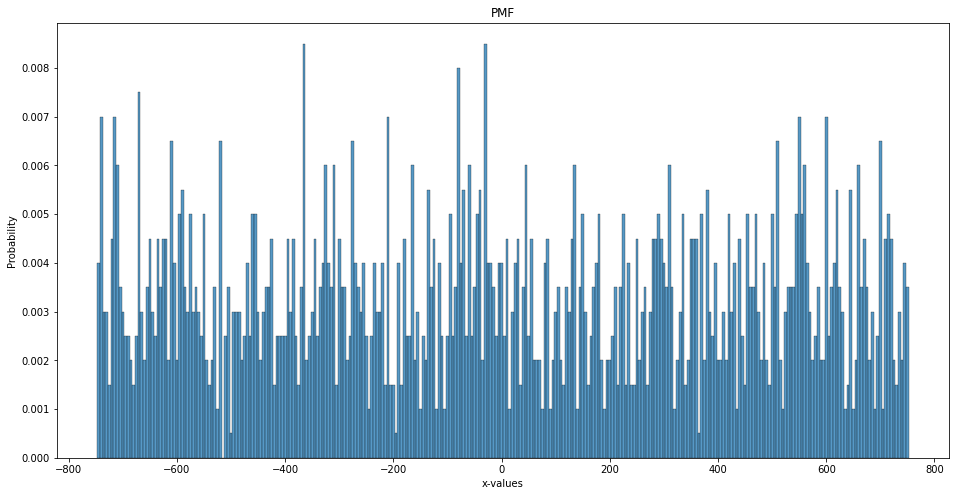

In [13]:
import math
y1 = child_dist(y,2000,5)
bcoef=0
for i in range(len(y)):
    bcoef=bcoef+math.sqrt(y[i]*y1[i])
print("Bhattacharya Coefficient :",bcoef)

<br><b>For $n=5000,n^{\prime}=3000, b_{s}=5$

Bhattacharya Coefficient : 0.9660159193055565


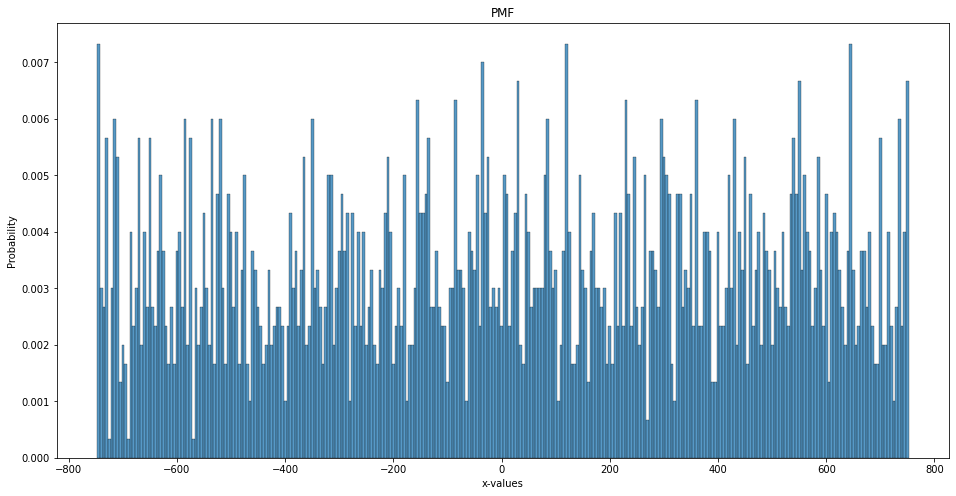

In [14]:
y1 = child_dist(y,3000,5)
bcoef=0
for i in range(len(y)):
    bcoef=bcoef+math.sqrt(y[i]*y1[i])
print("Bhattacharya Coefficient :",bcoef)

<br><b>For $n=5000,n^{\prime}=4000, b_{s}=5$

Bhattacharya Coefficient : 0.9759921749564786


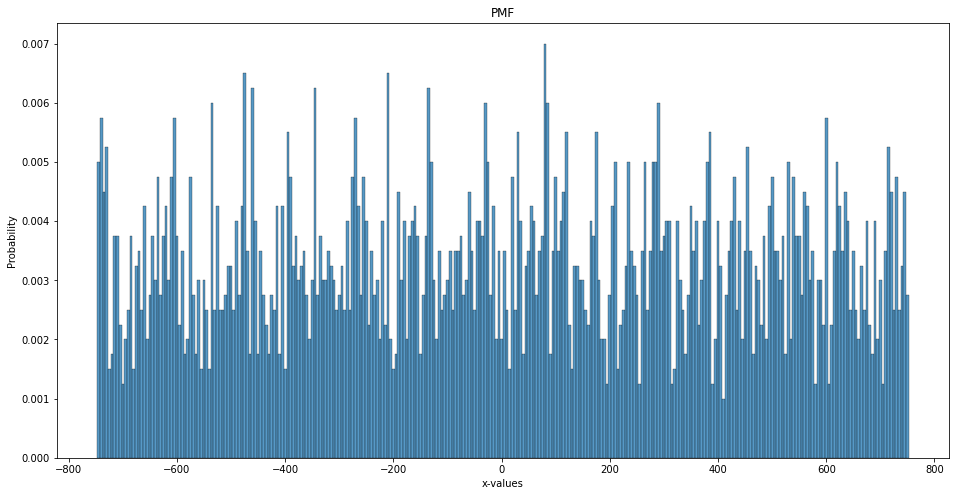

In [15]:
y1 = child_dist(y,4000,5)
bcoef=0
for i in range(len(y)):
    bcoef=bcoef+math.sqrt(y[i]*y1[i])
print("Bhattacharya Coefficient :",bcoef)

<br><b>For $n=5000,n^{\prime}=2000, b_{s}=10$

Bhattacharya Coefficient : 0.9825116461174326


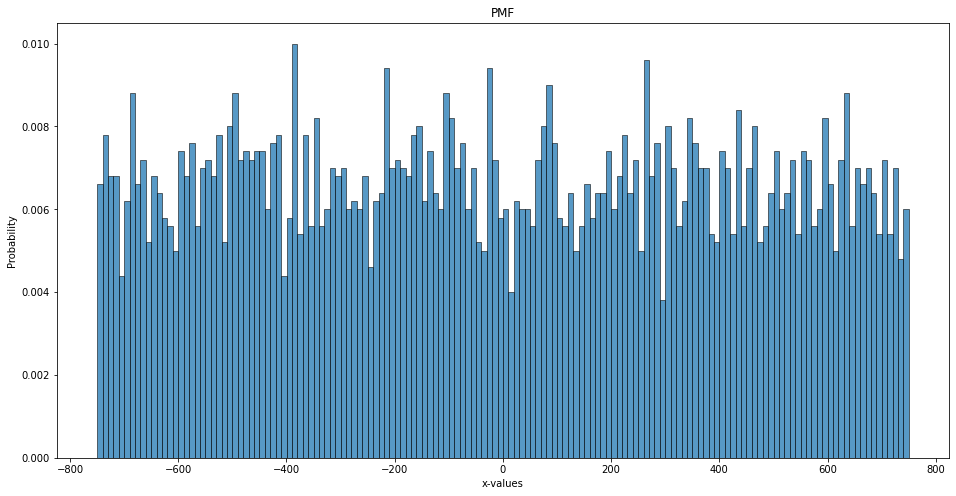

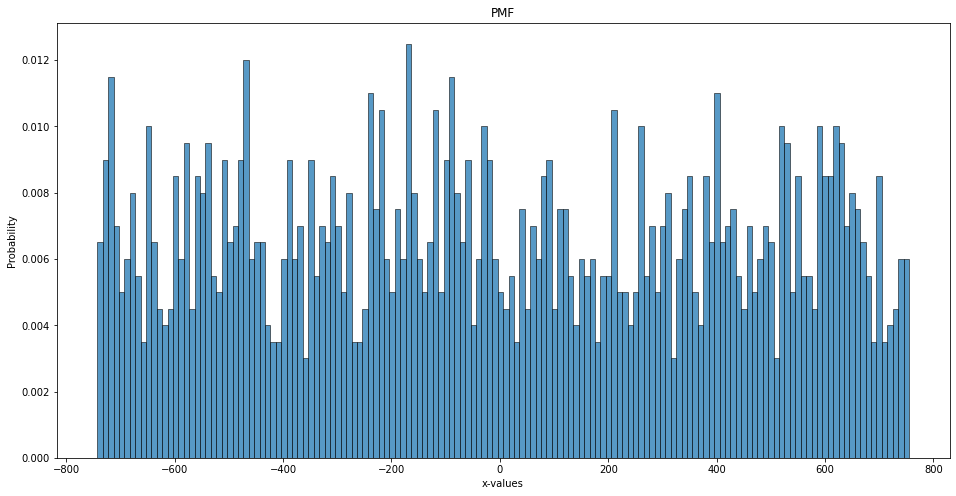

In [16]:
y = parent_dist(5000,10)
y1 = child_dist(y,2000,10)
bcoef=0
for i in range(len(y)):
    bcoef=bcoef+math.sqrt(y[i]*y1[i])
print("Bhattacharya Coefficient :",bcoef)

<br><b>For $n=5000,n^{\prime}=3000, b_{s}=10$

Bhattacharya Coefficient : 0.9858089594287147


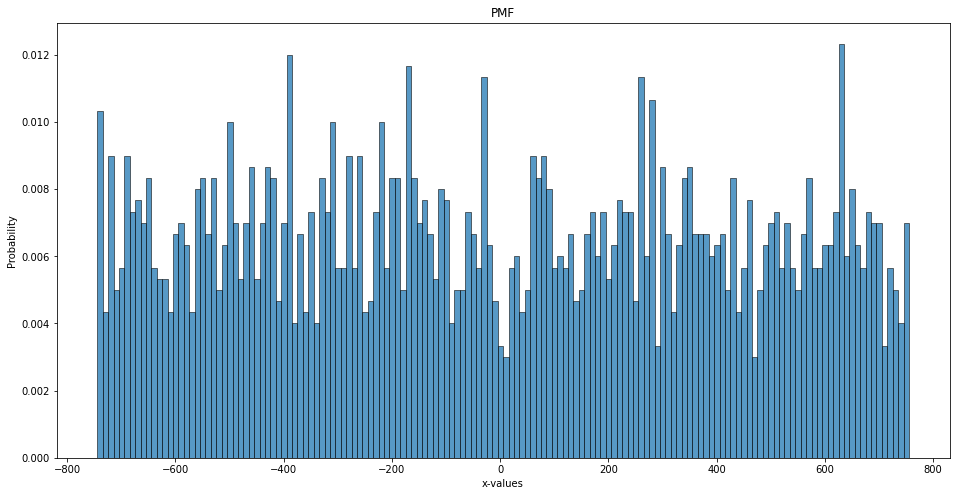

In [17]:
y1 = child_dist(y,3000,10)
bcoef=0
for i in range(len(y)):
    bcoef=bcoef+math.sqrt(y[i]*y1[i])
print("Bhattacharya Coefficient :",bcoef)

<br><b>For $n=5000,n^{\prime}=4000, b_{s}=10$

Bhattacharya Coefficient : 0.9871897891008463


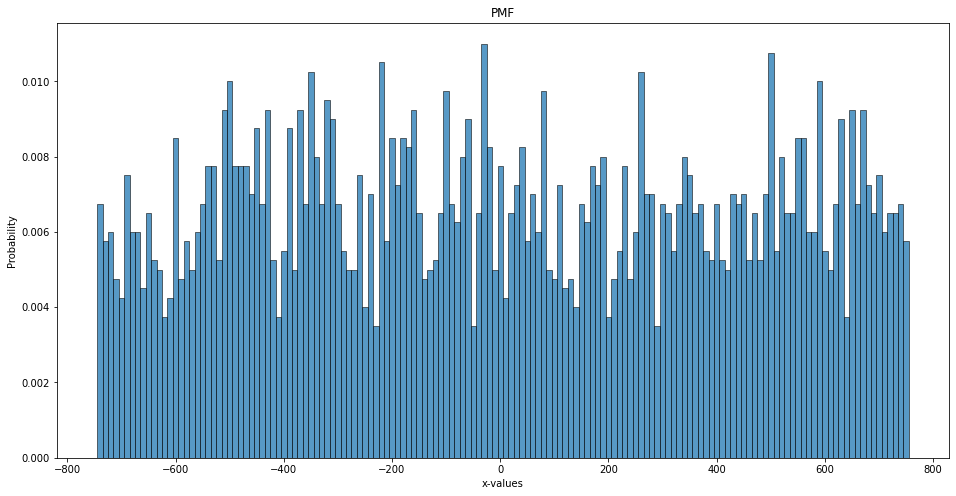

In [18]:
y1 = child_dist(y,4000,10)
bcoef=0
for i in range(len(y)):
    bcoef=bcoef+math.sqrt(y[i]*y1[i])
print("Bhattacharya Coefficient :",bcoef)

<b>Note: <br>1.As we can see the Bhattacharya coefficient gets better as $n$ and $n^{\prime}$ get closer given that bin size is constant.<br>2.Also the Bhattacharya coefficient is proportional to the bin size given that $n$ and $n^{\prime}$ are kept constant.